In [142]:
# Hello Everyone,
# Here We're going to perform an EDA on "Apple Stock Dataset From 2020 till 2025"
# You can find it here: https://www.kaggle.com/datasets/hardikchhipa28/apple-stock-dataset-from-2020-till-2025/data

# You'll be finding:

# Overview of Apple’s stock data from 2020 to 2025
# Cleaning and Preprocessing
# Time series visualizations for Close, Open, High, and Low prices
# Distribution analysis using histograms and KDE plots
# Feature engineering to create metrics like daily returns,moving averages, volatility.
# Extraction of date-based features like year, month, and weekday
# A correlation heatmap to understand relationships between numeric variables

In [143]:
# Importing Necessary Libarary

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [144]:
# Load Dataset
df = pd.read_csv('C:\\Users\\nikrc\\OneDrive\\Desktop\\Datasets\\apple_stocks.csv')

df.head(5)


,Date,Close,High,Low,Open,Volume
0,NaN,AAPL,AAPL,AAPL,AAPL,AAPL
1,2020-06-04,78.32931518554688,79.1312690763083,77.95506657558614,78.83236263047952,87560400
2,2020-06-05,80.56021881103516,80.62097312386399,78.55046881252456,78.57962969607472,137250400
3,2020-06-08,81.03653717041016,81.07056314819836,79.54441498185327,80.25645380649277,95654400
4,2020-06-09,83.59550476074219,83.98919153470604,80.68416273702039,80.71575616737768,147712400


In [145]:
# Checking the data types and shape
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1256 entries, 0 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1255 non-null   object
 1   Close   1256 non-null   object
 2   High    1256 non-null   object
 3   Low     1256 non-null   object
 4   Open    1256 non-null   object
 5   Volume  1256 non-null   object
dtypes: object(6)
memory usage: 59.0+ KB


In [146]:
# As we see above that there are fields that are not in right data type, We need convert them to their appropriate data type

df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d",errors = "coerce")
cols = ["Close","Open","High","Low","Volume"]
for col in cols:
    df[col] = pd.to_numeric(df[col],errors = "coerce")
    
# Next we remove any non-numeric data
df = df.dropna()
df["Volume"] = df["Volume"].astype(int).reset_index(drop = True)
df.head()


,Date,Close,High,Low,Open,Volume
1,2020-06-04,78.329315,79.131269,77.955067,78.832363,137250400.0
2,2020-06-05,80.560219,80.620973,78.550469,78.579630,95654400.0
3,2020-06-08,81.036537,81.070563,79.544415,80.256454,147712400.0
4,2020-06-09,83.595505,83.989192,80.684163,80.715756,166651600.0
5,2020-06-10,85.746208,86.215230,84.105842,84.545702,201662400.0


In [147]:
# Statistical Data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1255,2022-11-30 12:32:42.071713280,2020-06-04 00:00:00,2021-08-31 12:00:00,2022-11-29 00:00:00,2024-02-29 12:00:00,2025-06-02 00:00:00,NaN
Close,1255.0,164.321062,78.329315,136.922234,162.264175,188.222137,258.396667,38.179689
High,1255.0,166.006163,79.131269,139.392588,163.728834,189.675969,259.474086,38.364282
Low,1255.0,162.443943,77.955067,134.935222,160.141728,186.846649,257.010028,37.891117
Open,1255.0,164.160646,78.57963,136.720468,161.654384,188.1025,257.568678,38.094942
Volume,1254.0,80774969.457735,23234700.0,52391125.0,70451650.0,95646600.0,374336800.0,41929450.207341


In [148]:
# Overall, prices have more than tripled from the minimum to maximum value

In [149]:
# Finding if any data is missing
df.isna().mean()*100

Date      0.000000
Close     0.000000
High      0.000000
Low       0.000000
Open      0.000000
Volume    0.079681
dtype: float64

In [150]:
df["Volume"] = df["Volume"].fillna(method = "ffill")
df.isna().mean()*100


Date      0.0
Close     0.0
High      0.0
Low       0.0
Open      0.0
Volume    0.0
dtype: float64

In [151]:
# Cheching for Duplicates
df.duplicated().mean()*100

np.float64(0.0)

In [152]:
# We're done with Cleaning the Dataset, Let's start with EDA

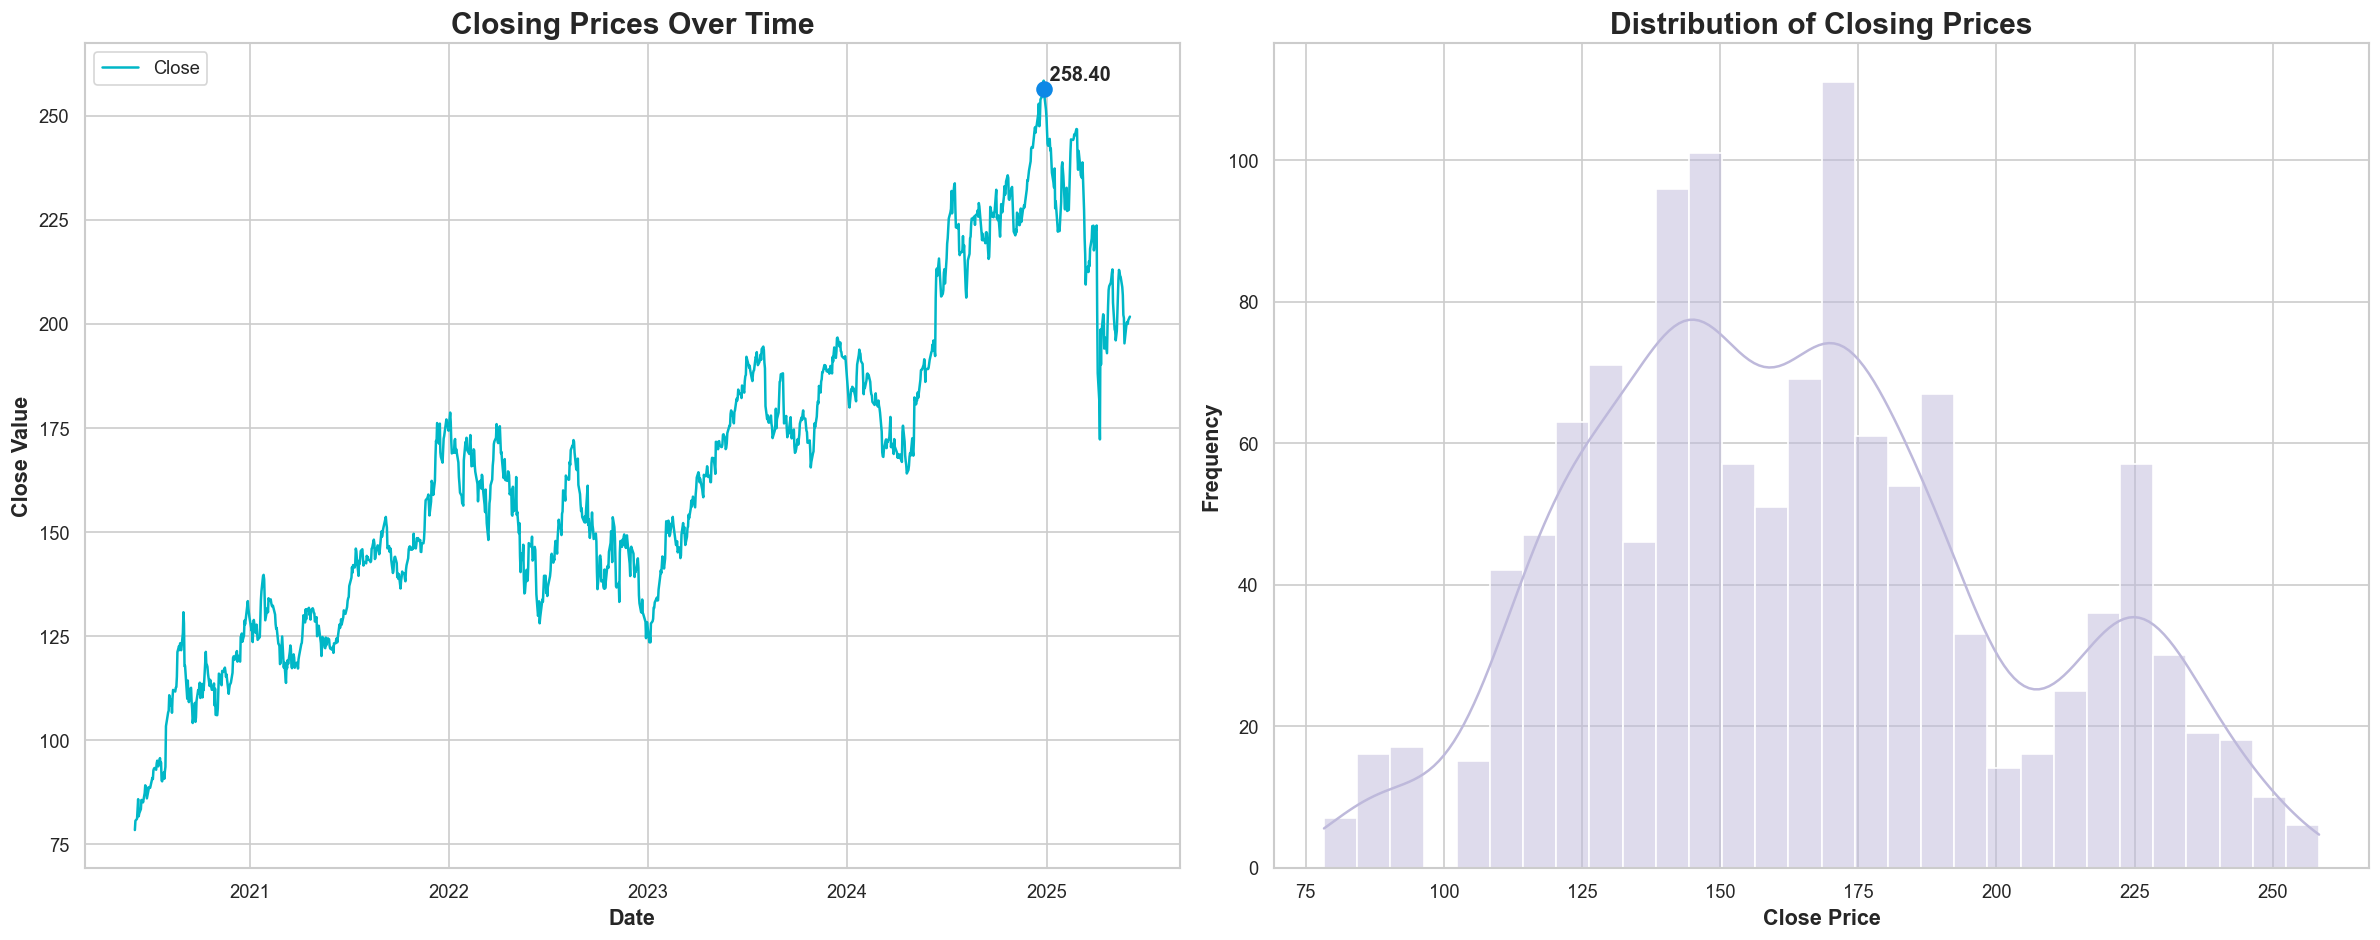

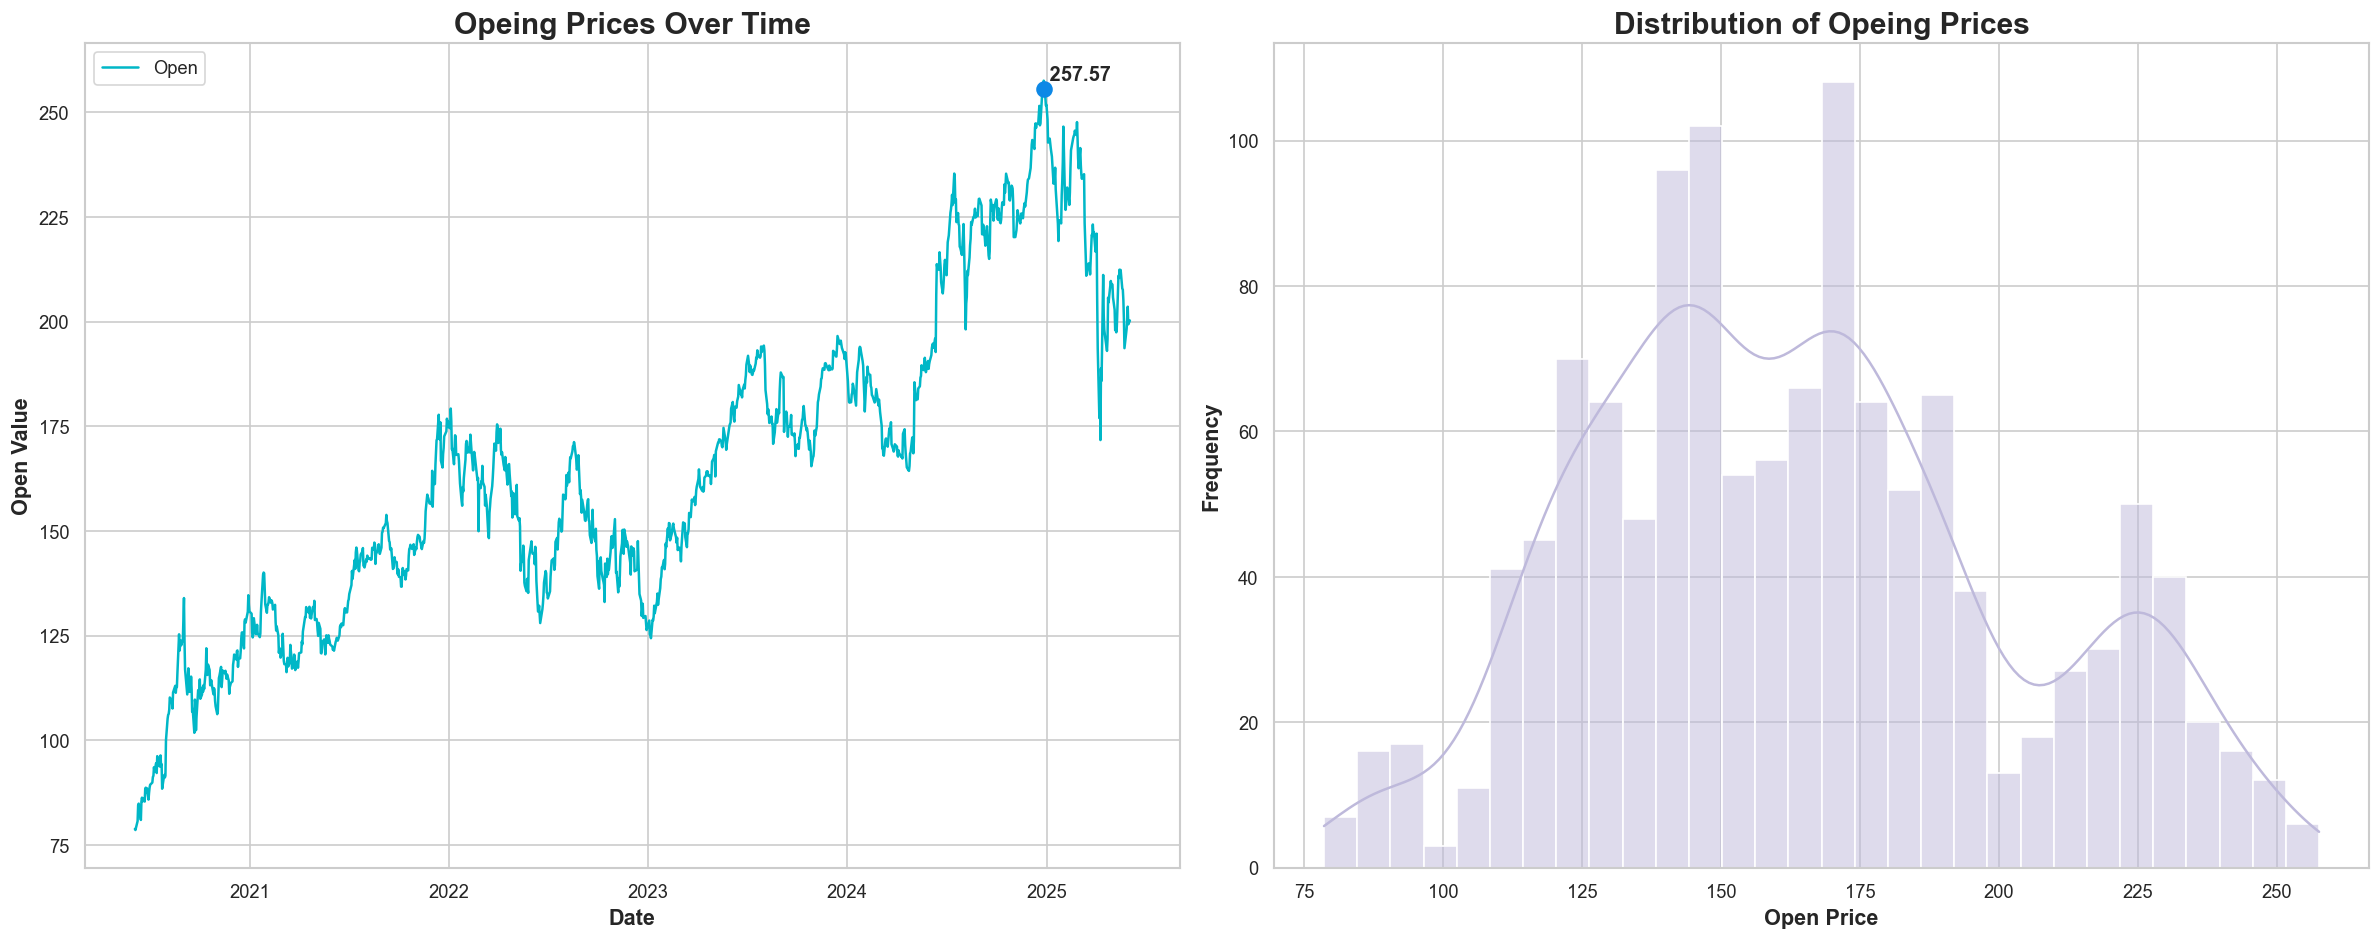

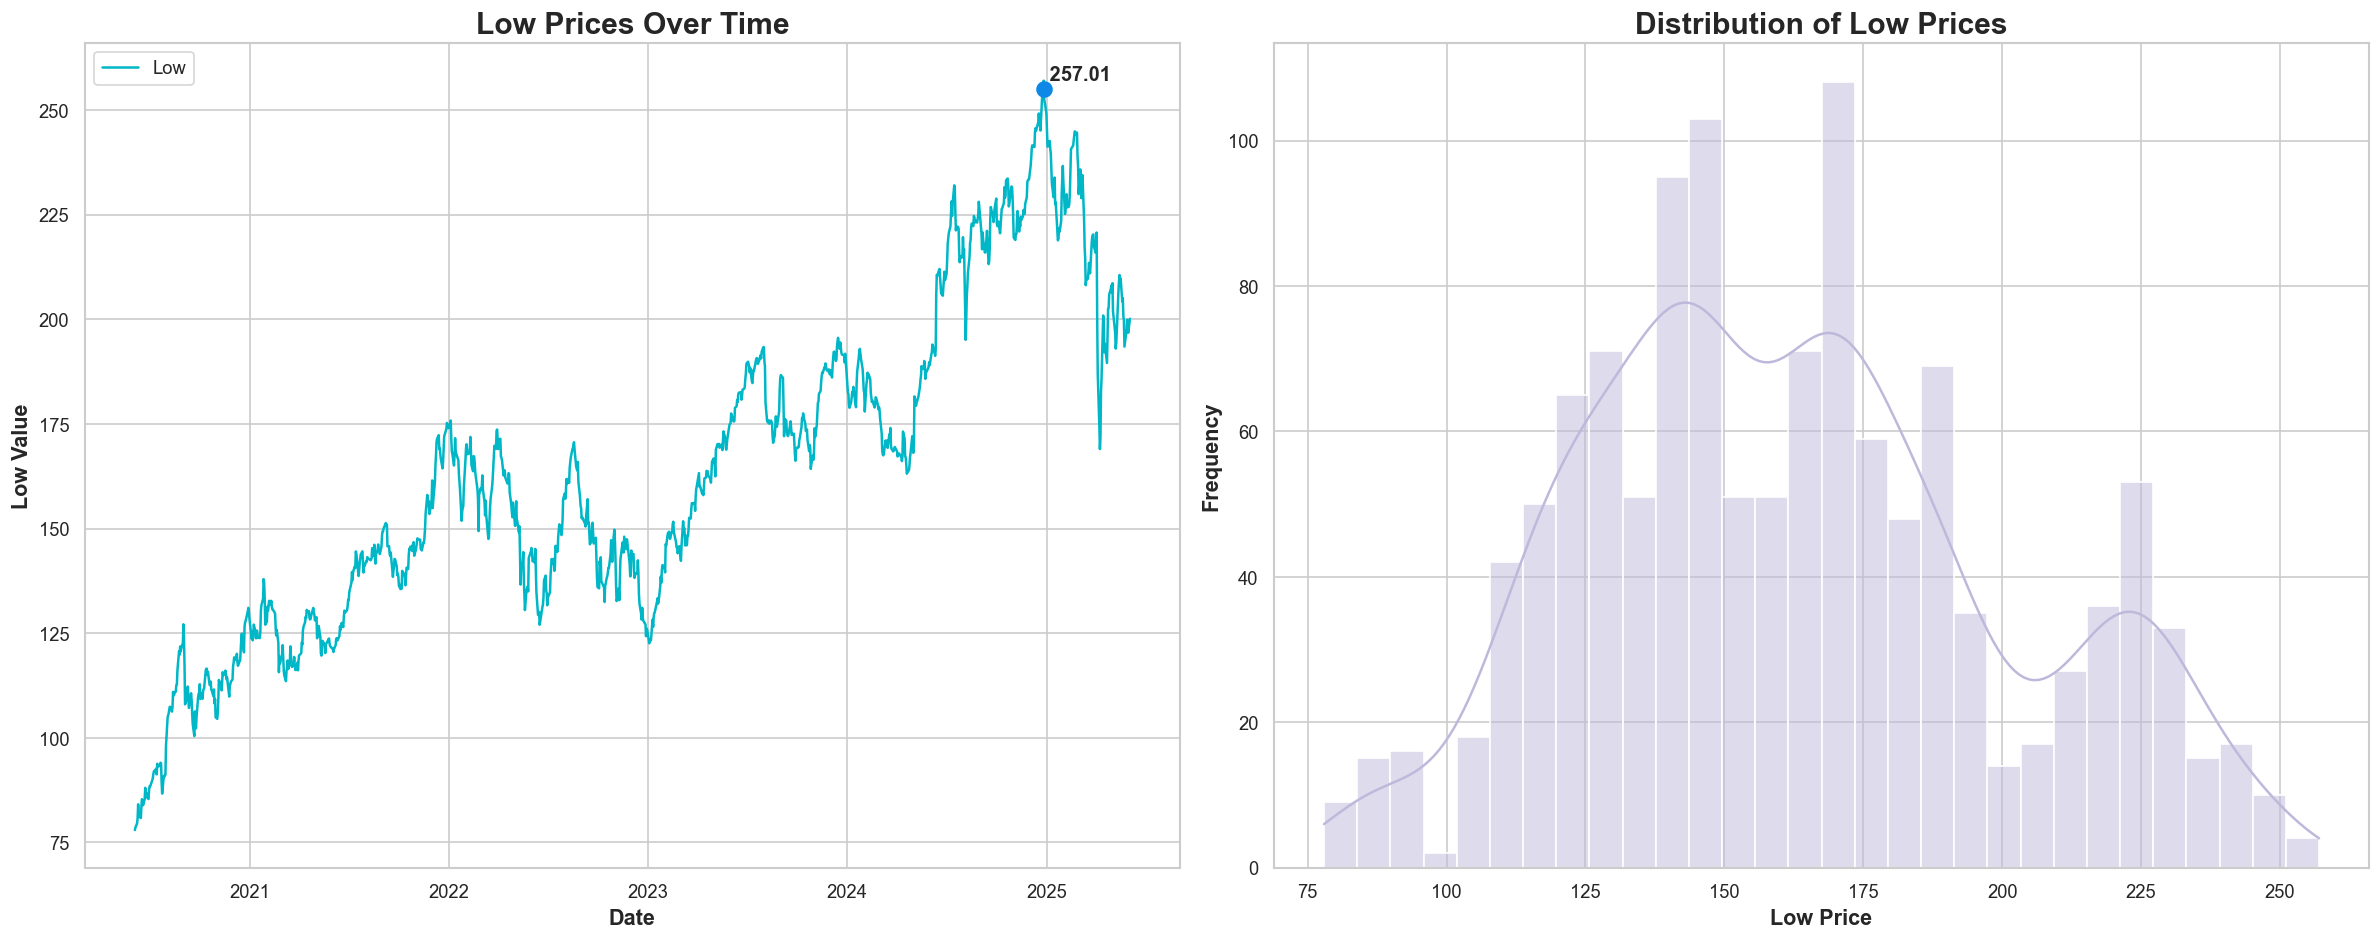

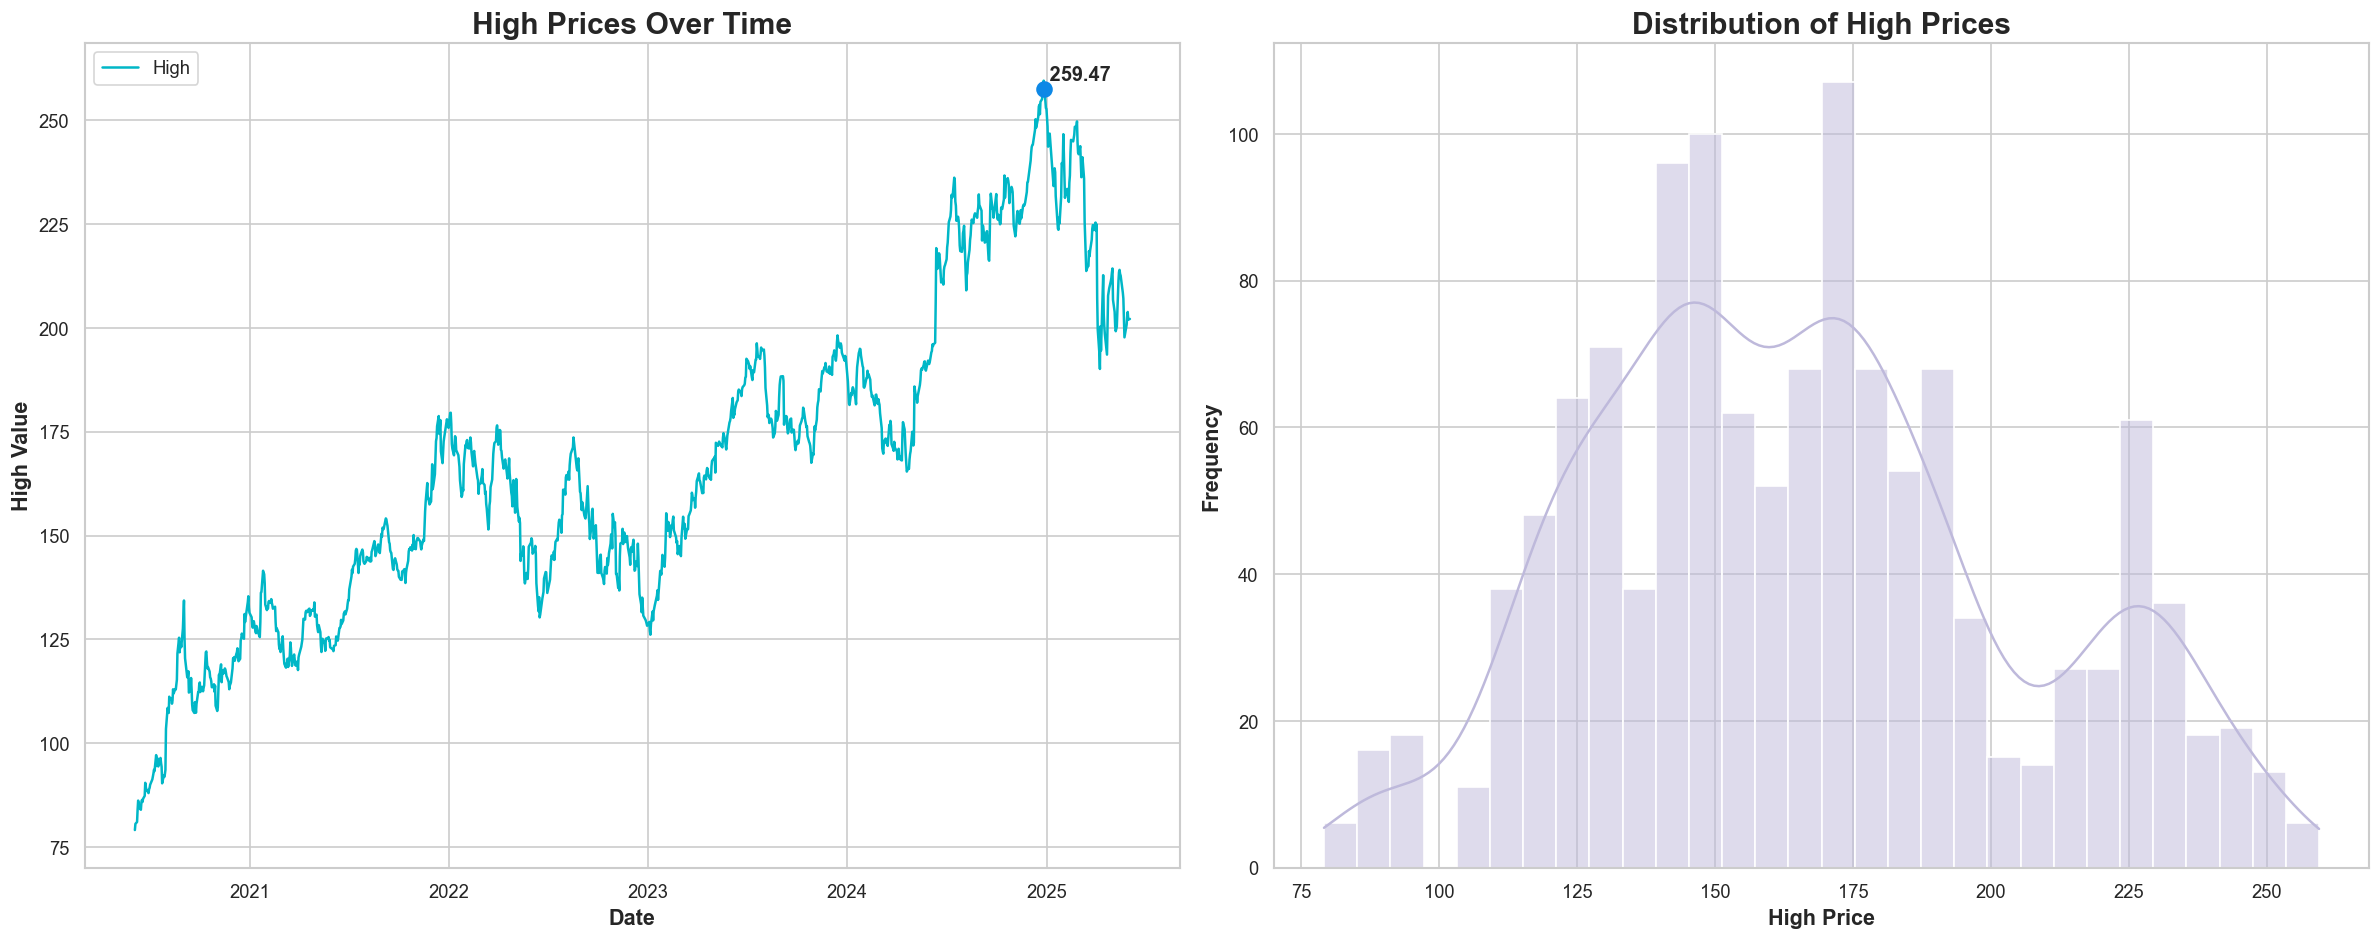

In [153]:
# Time Series of Close
cols = ["Close","Open","Low","High"]
for col in cols:
    fig,axes = plt.subplots(1,2,figsize = (20,8),dpi = 120)
    sns.lineplot(x = df["Date"],y = df[col],ax = axes[0],color = '#00b7c7',label = col)
    axes[0].set_xlabel("Date",fontsize = 13,fontweight = "semibold")
    axes[0].set_ylabel(f"{col} Value",fontsize = 13,fontweight = "semibold")
    axes[0].set_title(f"{col[:-1] + 'ing' if col in ['Open', 'Close'] else col} Prices Over Time",fontsize = 18,fontweight = "bold")
    axes[0].legend()
    axes[0].grid(True)
    
    max_value = df[col].max()
    max_date = df.loc[df[col] == max_value,"Date"].values[0]
    axes[0].scatter(max_date, max_value - 2, color='#0d88e6', s=80, zorder=5, label='Max Close')
    axes[0].annotate(
        f"{max_value: .2f}",
        xy = (max_date,max_value),
        fontsize = 12,
        fontweight ="semibold",
    )

    
    
    # Histogram of Closing Price
    sns.histplot(data = df[col],ax = axes[1],kde = True,bins = 30,color='#beb9db')
    axes[1].set_ylabel("Frequency",fontsize = 13,fontweight = "semibold")
    axes[1].set_xlabel(f'{col} Price',fontsize = 13,fontweight = "semibold")
    axes[1].set_title(f"Distribution of {col[:-1] + 'ing' if col in ['Open', 'Close'] else col} Prices",fontsize = 18,fontweight = "bold")
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

In [154]:
# Time Series Trends

# For each of Close, Open, High, Low:
# Line charts show a general uptrend with some fluctuations.
# And I've marked Max values using a scatter marker and label.
# Close peaked at ~$258, High and Low followed similar trends.

# Distributions

# All prices (Open, Close,Low and High) show a somewhat normal distribution but slightly right-skewed, meaning more values cluster on the lower end.
# Volume is heavily right-skewed, suggesting a few days with massive trading spikes.

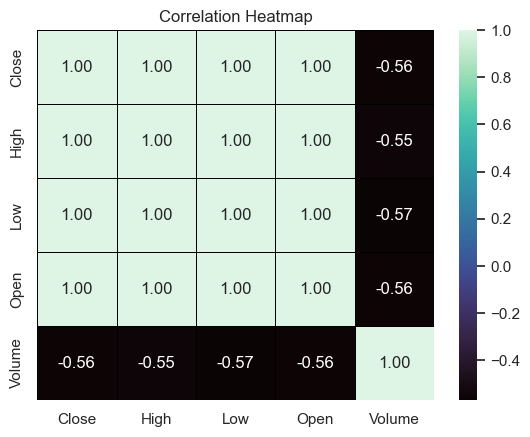

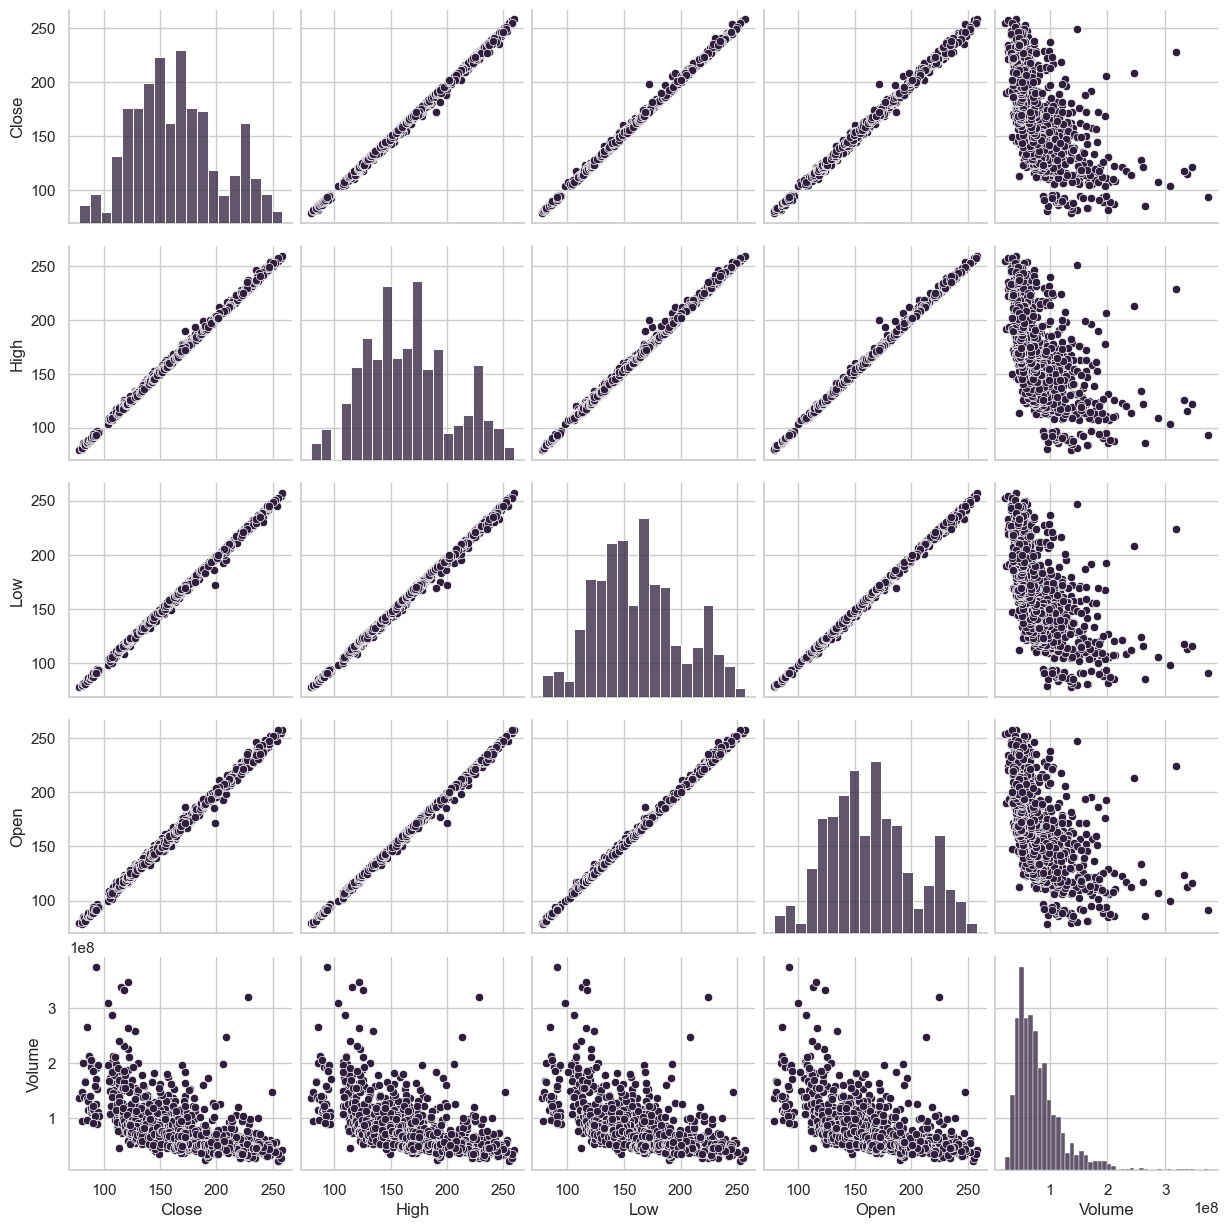

In [155]:
# Correlation Matrix
numeric_df = df.select_dtypes(include = [np.number])
if(numeric_df.shape[1] >= 4):
    corr_matrix = numeric_df.corr()
    sns.heatmap(data = corr_matrix,annot = True,cmap = 'mako',fmt = '.2f',linewidths=0.5,linecolor='black')
    plt.title("Correlation Heatmap")
    plt.grid(True)
    plt.show()
else:
    print('Not enough numeric features for a correlation heatmap.')
    
# Pairplot for numeric values

sns.set(style="whitegrid", palette="mako")
sns.pairplot(numeric_df)

plt.show()

In [156]:
# Correlation Insights

# A correlation heatmap shows:
# Open, Close, High, Low are strongly correlated (r > 0.95).
# Volume shows a weaker correlation with the price-related features — expected, as price doesn't always track with trading volume.

#  Pairplot Insights

# Confirmed linear relationships between price features.
# Showed clear scatter clusters for price comparisons.
# Volume shows spread, not tightly correlated with price metrics.

In [157]:
# Feature Engineering

# Daily Return(%)
df['Daily Return(%)'] = df['Close'].pct_change()

# Rolling Means(7 Days and 30 Days)
df['MA_7'] = df['Close'].rolling(window = 7).mean()
df['MA_30'] = df['Close'].rolling(window = 30).mean()

# Rolling Volatility
df['Volatility_7'] = df['Close'].rolling(window = 7).std()
df['Volatility_30'] = df['Close'].rolling(window = 30).std()

# Cumulative Return
df['Cumulative Return'] = (1 + df['Daily Return(%)']).cumprod()

# Date Feature
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df["Day Of Week"] = df['Date'].dt.dayofweek

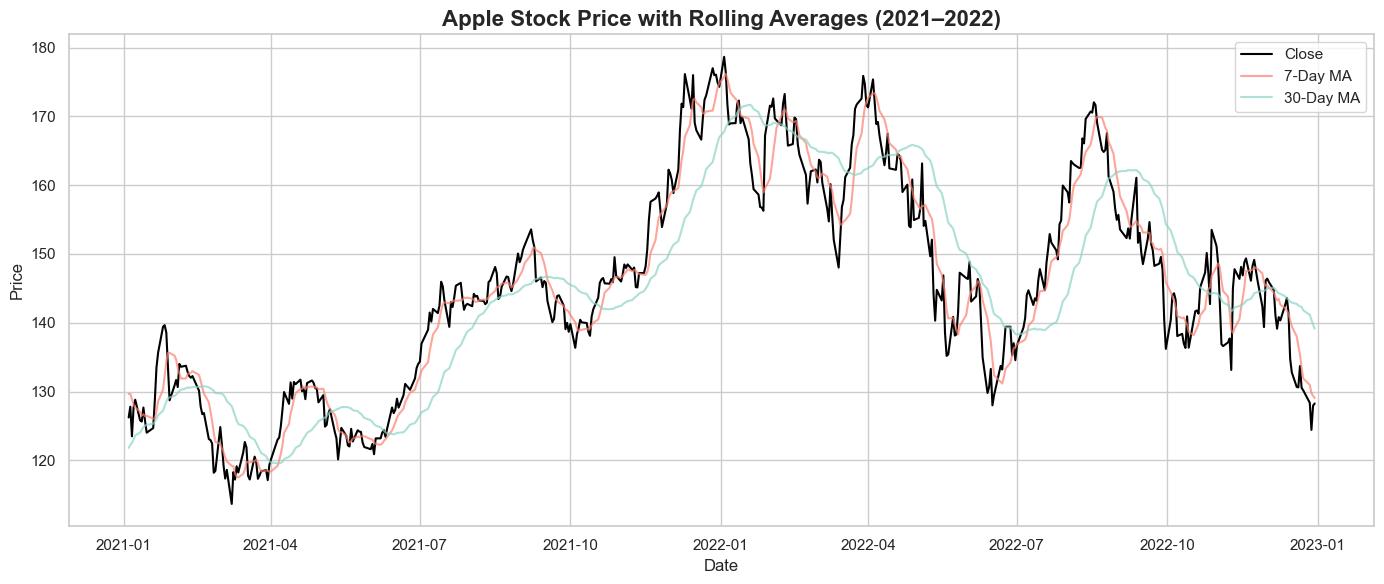

In [158]:
df_filtered = df[df['Year'].isin([2021, 2022])]

plt.figure(figsize=(14, 6))
sns.lineplot(x='Date', y='Close', data=df_filtered, label='Close', color='black')
sns.lineplot(x='Date', y='MA_7', data=df_filtered, label='7-Day MA', color='#fd7f6f', alpha=0.7)
sns.lineplot(x='Date', y='MA_30', data=df_filtered, label='30-Day MA', color='#8bd3c7', alpha=0.7)

plt.title("Apple Stock Price with Rolling Averages (2021–2022)", fontsize=16, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [159]:
# Between 2021 and 2022, Apple stock price moved in sync with short-term trends (7-day MA) and stayed slightly above the long-term trend (30-day MA) — a sign of steady, healthy upward momentum.
# This likely indicates investor confidence, low short-term volatility, and a gradual bullish build-up during that period.

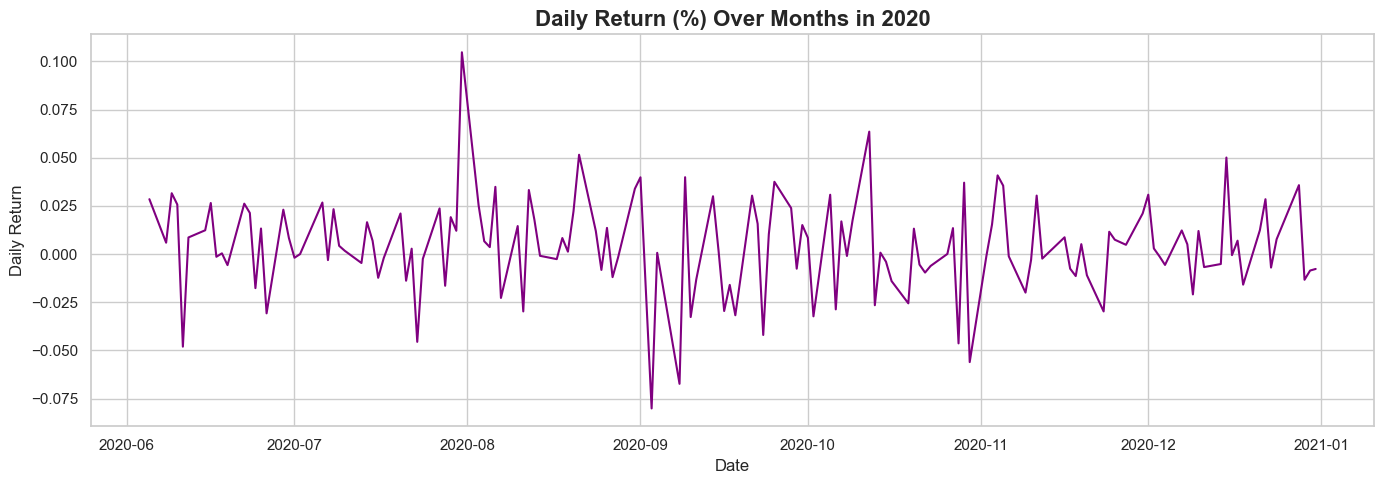

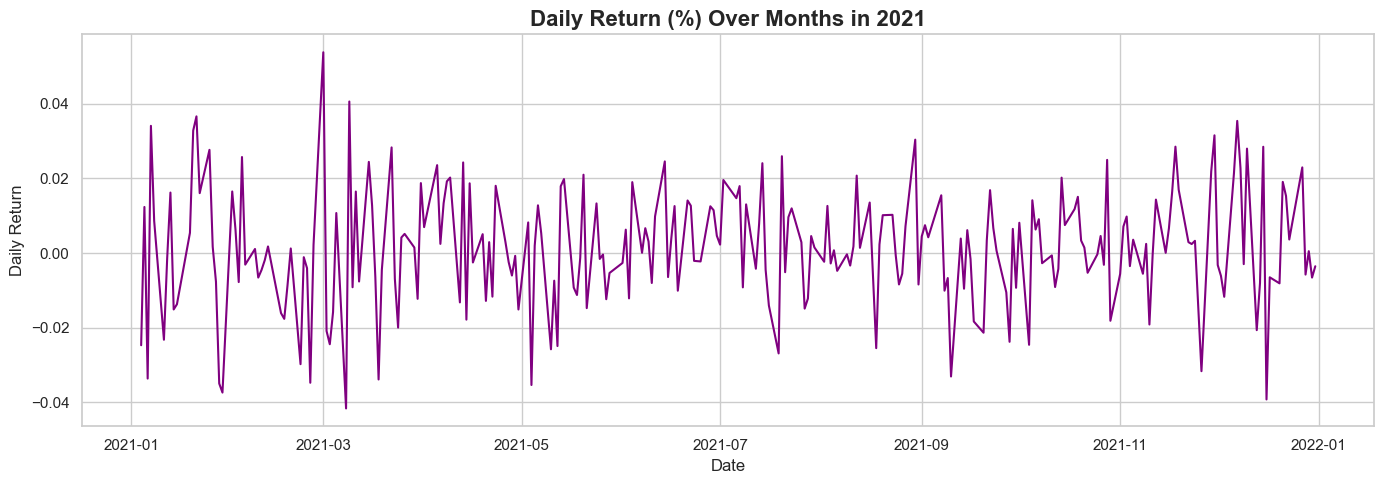

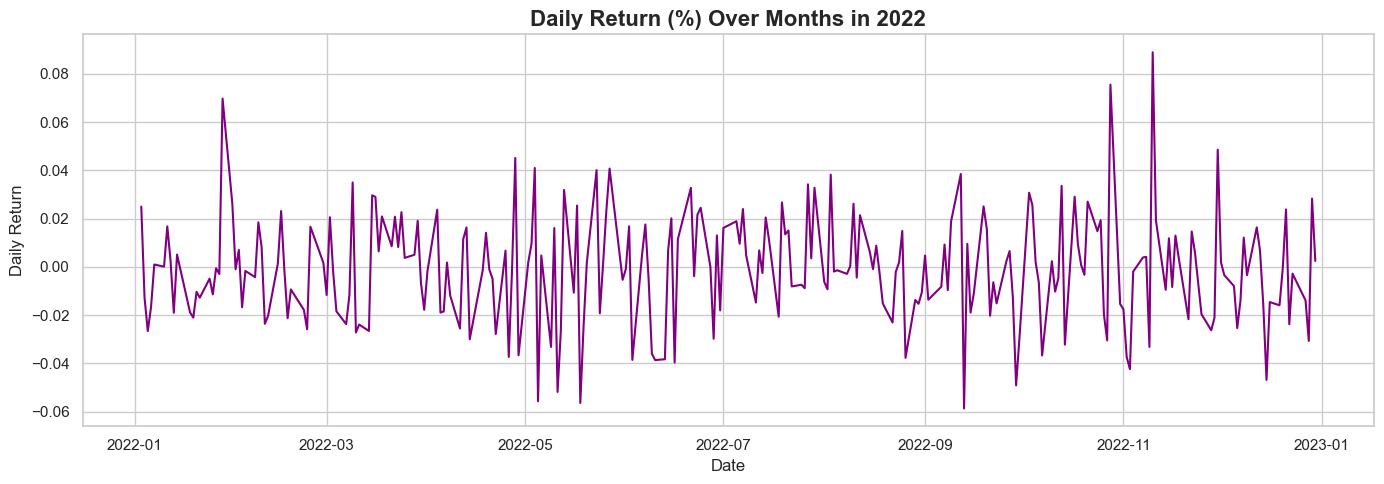

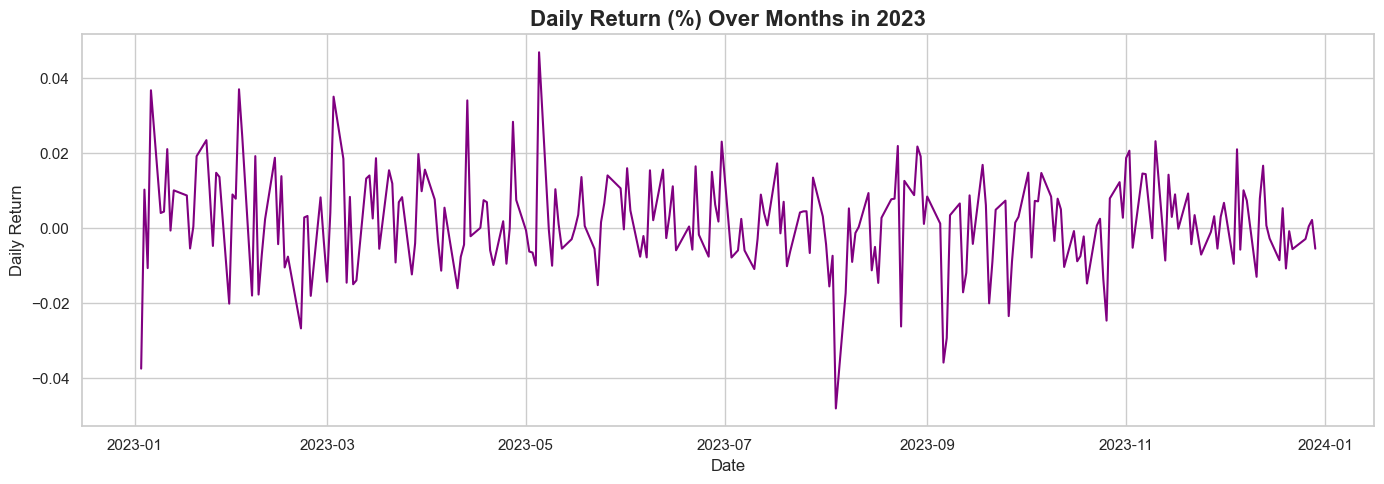

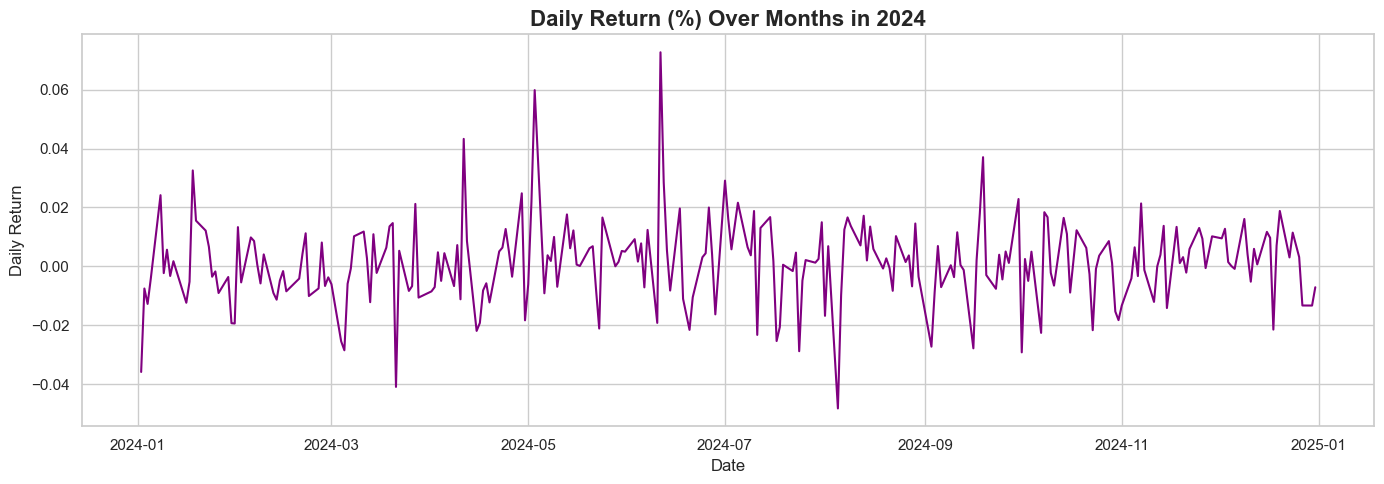

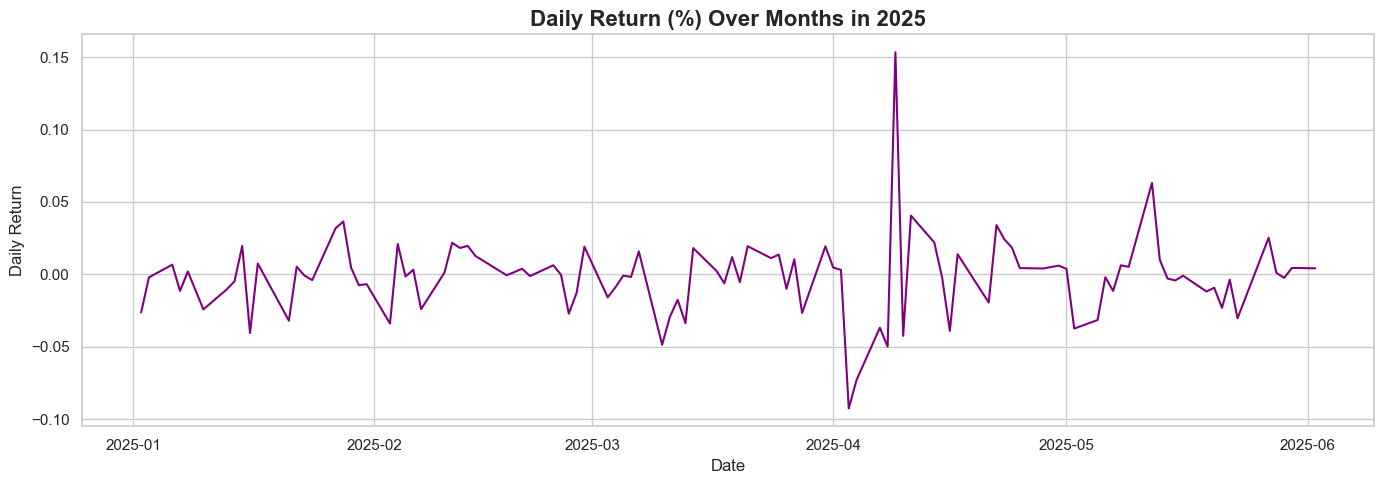

In [160]:
# Daily Return Plot

for year in df['Year'].unique():
    df_filtered = df[df['Date'].dt.year == year]
    plt.figure(figsize=(14, 5))
    sns.lineplot(x='Date', y='Daily Return(%)', data=df_filtered, color='purple')
    plt.title(f"Daily Return (%) Over Months in {year}", fontsize=16, fontweight="bold")
    plt.xlabel("Date")
    plt.ylabel("Daily Return")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [161]:
# In 2020, Apple stock exhibited extreme daily returns, including a 100% spike, likely caused by high market volatility, major events like COVID, and possibly a stock split in August.
# Daily returns smoothed out in later years (2022–2025), signaling more market stability and less speculative movement.

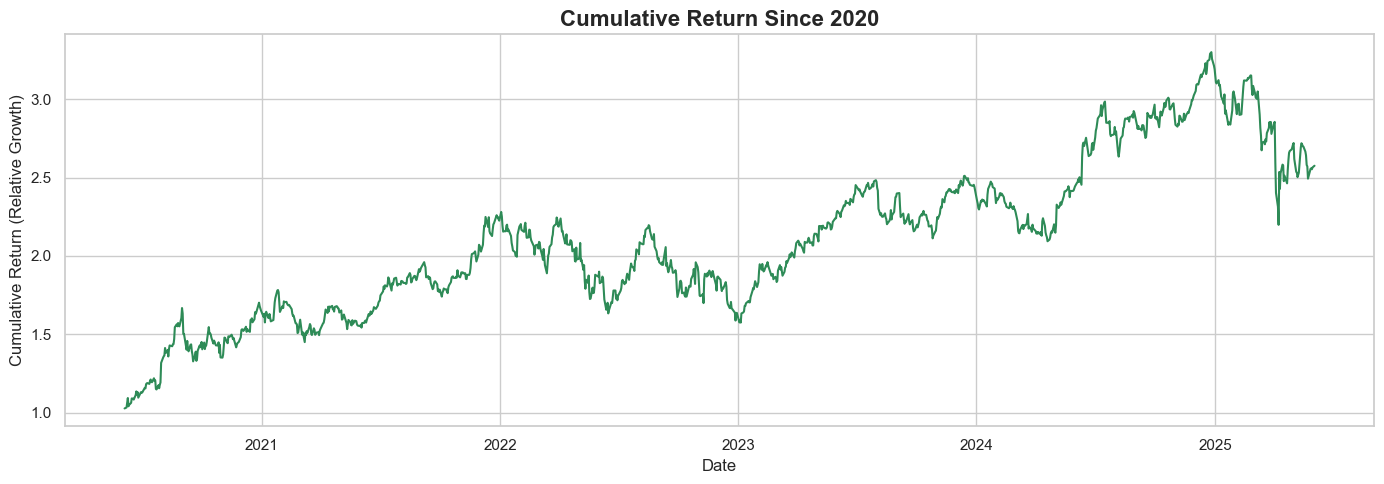

In [162]:
plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Cumulative Return', data=df, color='seagreen')
plt.title("Cumulative Return Since 2020", fontsize=16, fontweight="bold")
plt.xlabel("Date")
plt.ylabel("Cumulative Return (Relative Growth)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [163]:
# Tripled investment: From 1.0 to ~3.0 at the peak → 200% growth over 5 years.
# Market cycles are clear: growth → correction → rebound.
# The chart reflects Apple’s strength as a long-term investment, despite short-term volatility.
# Highlights why holding long-term pays off, but also shows why timing and diversification matter.

In [164]:
# This marks the end of the Exploratory Data Analysis (EDA) for the "Apple Stock Dataset from 2020 to 2025".
# I hope this deep dive helped you understand how Apple's stock has evolved over the years — from trends and volatility to cumulative returns and engineered insights.

# I genuinely hope the analysis was insightful, and that I was able to provide value throughout this exploration.
# Your feedback and suggestions are always welcome — I’d truly appreciate them as I continue learning and improving.

# Thank you! 🙏